In [17]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
s1 = pd.read_csv("results_S1.csv", index_col="Unnamed: 0")
s2 = pd.read_csv("results_S2.csv", index_col="Unnamed: 0")
s3 = pd.read_csv("results_S3.csv", index_col="Unnamed: 0")
s4 = pd.read_csv("results_S4.csv", index_col="Unnamed: 0")

<Figure size 2400x1200 with 0 Axes>

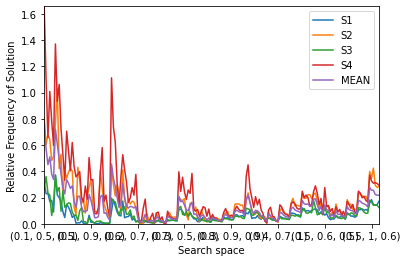

In [19]:
mxs = [0.1, 0.2, 0.3, 0.4, 0.5]
mps = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
crs = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

index = l = [(i, j, k) for i in mxs for j in mps for k in crs]

TSCC = pd.DataFrame([s1.TSCC, s2.TSCC, s3.TSCC, s4.TSCC]).T
TSCC.columns = ["S1", "S2", "S3", "S4"]
TSCC.index = index

TSCC_rel = (TSCC - TSCC.min())/TSCC.min()
TSCC_rel['MEAN'] = TSCC_rel.mean(axis=1)

TSCC.to_csv("TSCC.csv", header=True, index=True)
TSCC_rel.to_csv("TSCC_rel.csv", header=True, index=True)

mxs = [0.1, 0.2, 0.3, 0.4, 0.5]
mps = [0.5, 0.6, 0.7, 0.8, 0.9, 1]
crs = [0.5, 0.6, 0.7, 0.8, 0.9, 1]

index = l = [(i, j, k) for i in mxs for j in mps for k in crs]

TSCC = pd.DataFrame([s1.TSCC, s2.TSCC, s3.TSCC, s4.TSCC]).T
TSCC.columns = ["S1", "S2", "S3", "S4"]
TSCC.index = index

TSCC_rel = (TSCC - TSCC.min())/TSCC.min()
TSCC_rel['MEAN'] = TSCC_rel.mean(axis=1)

TSCC.to_csv("TSCC.csv", header=True, index=True)
TSCC_rel.to_csv("TSCC_rel.csv", header=True, index=True)


plt.figure(figsize=(8, 4), dpi=300)
TSCC_rel.plot()
plt.legend(loc="upper right")
plt.xlabel("Search space")
plt.ylabel("Relative Frequency of Solution")
plt.margins(0,0)